In [29]:
import pandas as pd

df = pd.read_csv("/Users/giovanni-lunetta/stat_4185/final_project/2022-2023_season/data/cleaned.csv")

In [30]:
df = df.drop("Unnamed: 0", axis=1)

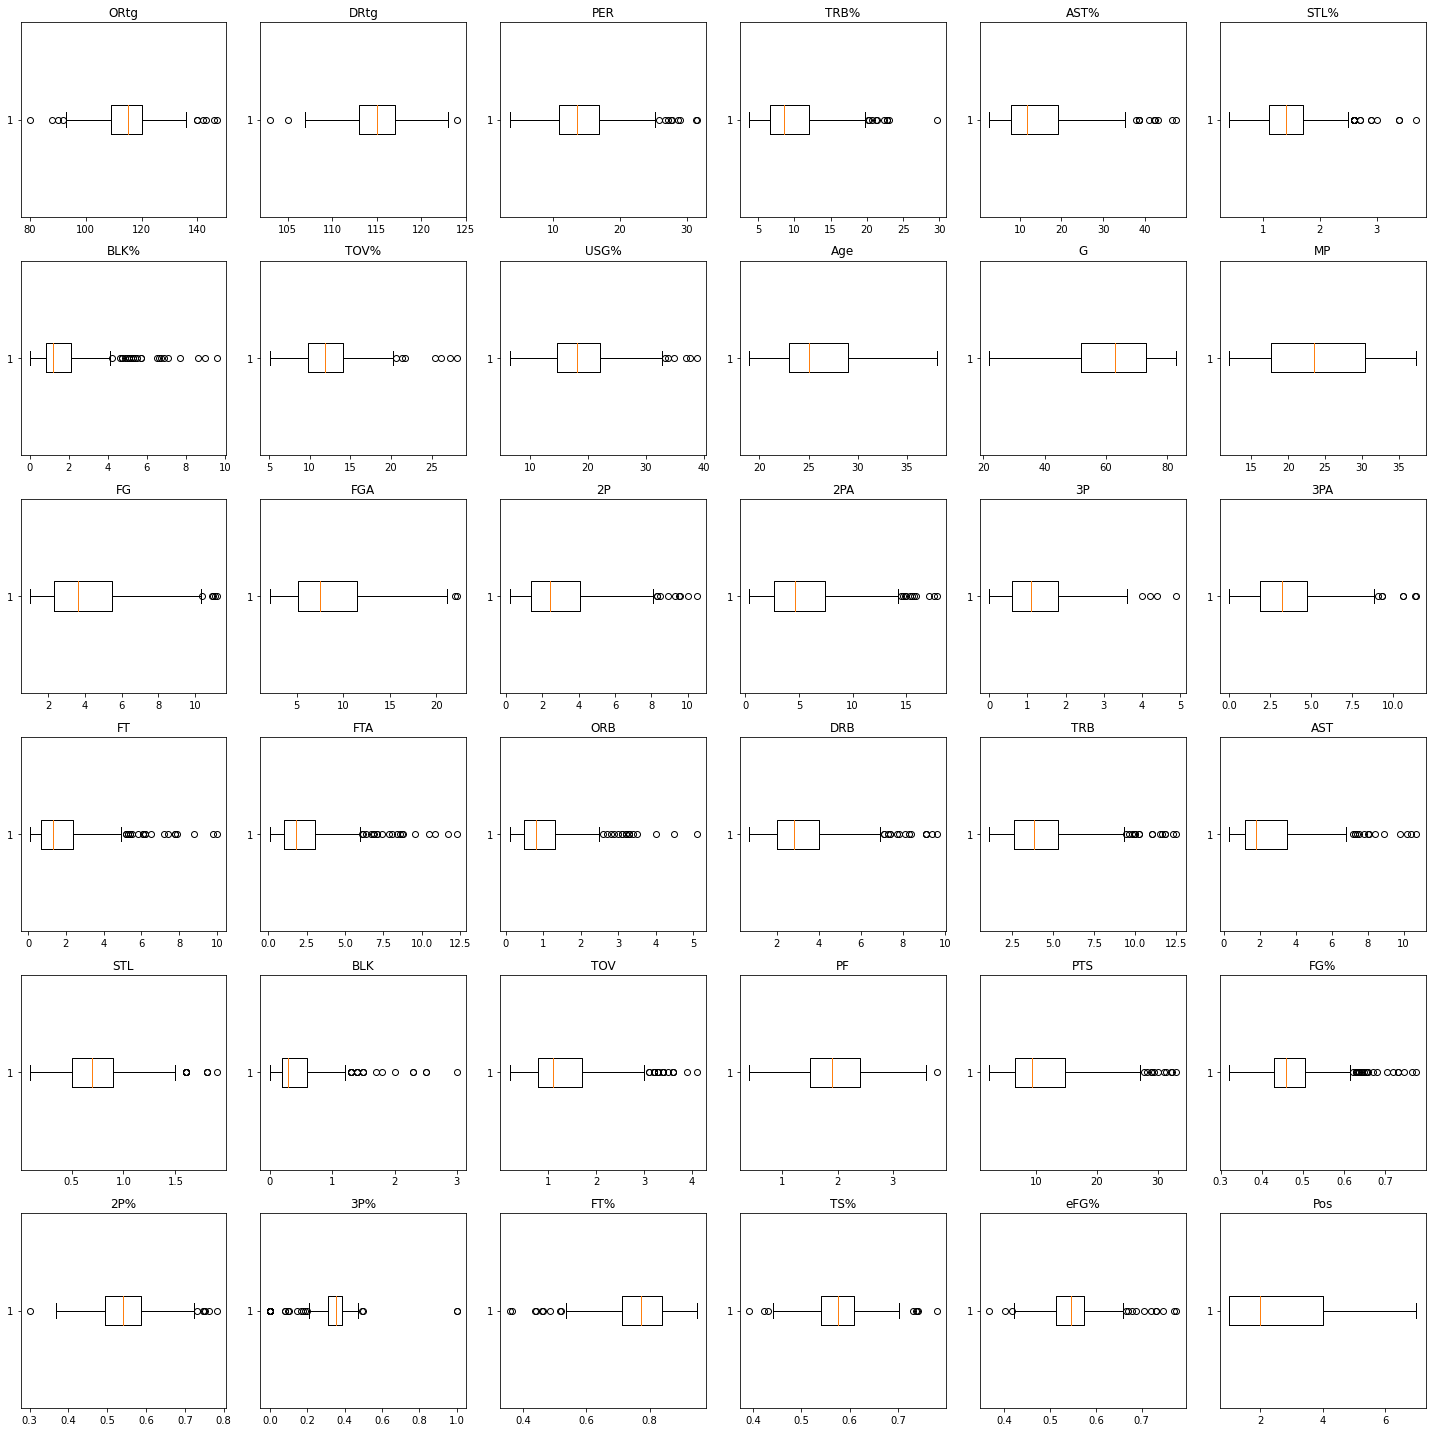

In [31]:
import matplotlib.pyplot as plt

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))

# create a boxplot for each continuous variable
for ax, col in zip(axes.flatten(), df.select_dtypes(include=['float64', 'int64']).columns):
    ax.boxplot(df[col], vert=False)
    ax.set_title(col)

# adjust the layout and save the figure
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

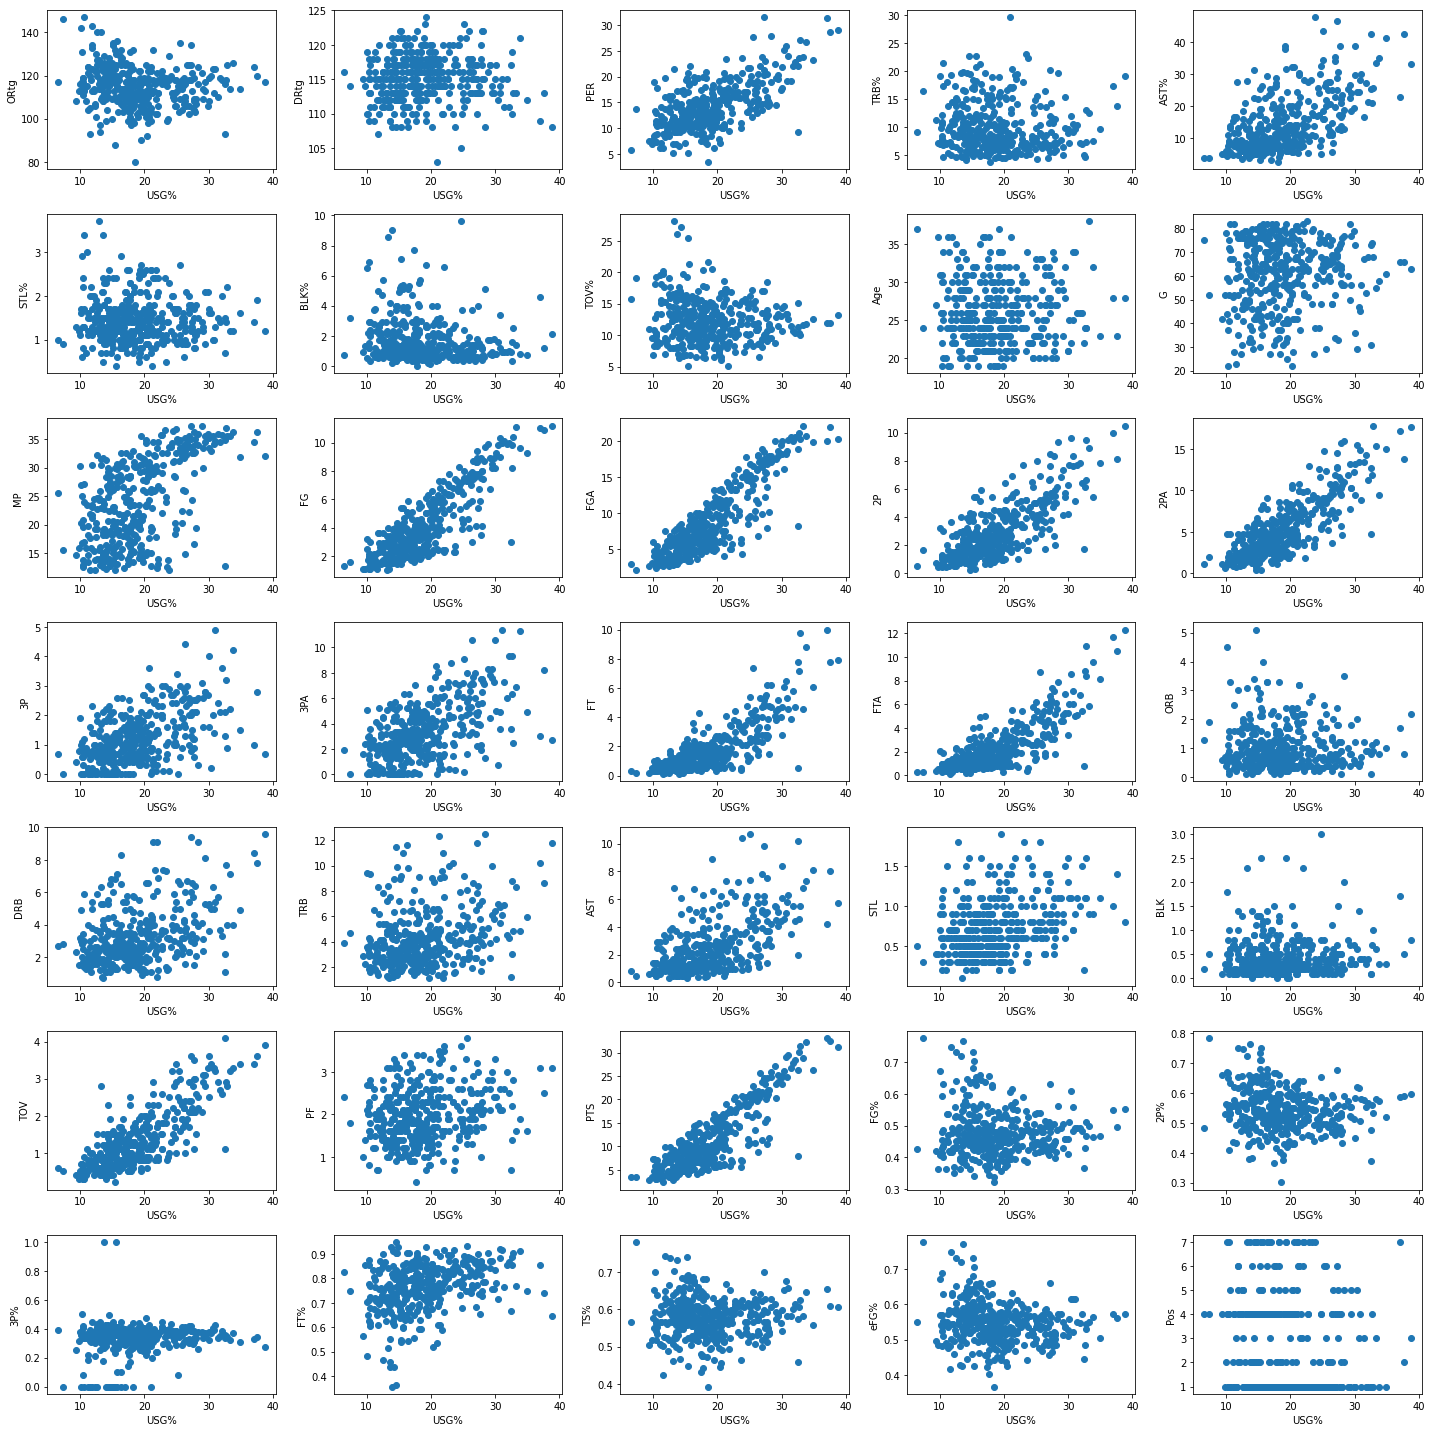

In [32]:
# select the columns to plot (all continuous variables and USG%)
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols.remove('USG%')
cols.append('USG%')

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 20))

# create a scatter plot for each continuous variable in relation to USG%
for ax, col in zip(axes.flatten(), cols):
    ax.scatter(df['USG%'], df[col])
    ax.set_xlabel('USG%')
    ax.set_ylabel(col)

# adjust the layout and save the figure
plt.tight_layout()
plt.savefig('scatterplots.png')
plt.show()

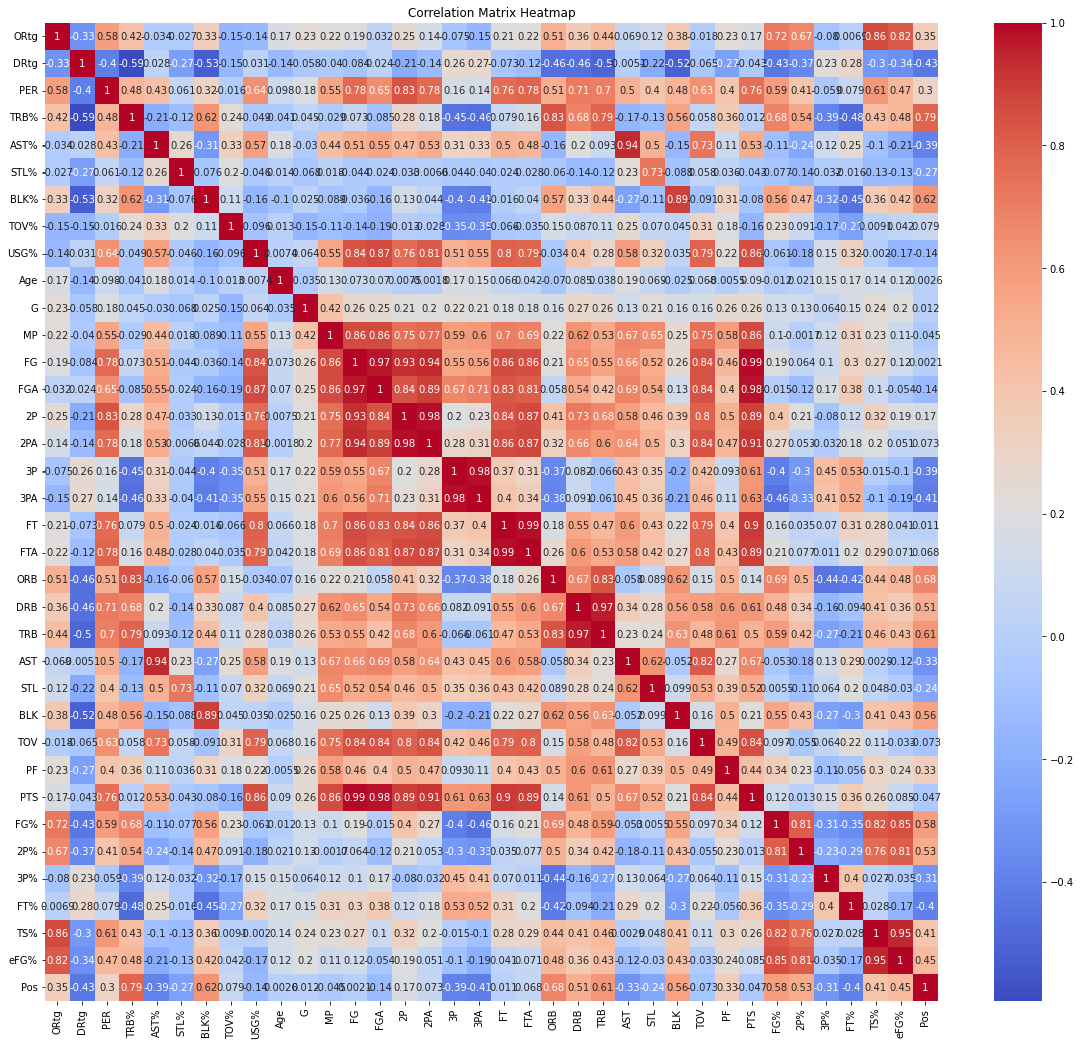

In [33]:
import seaborn as sns
import numpy as np

# calculate the correlation matrix
corr_matrix = df.corr()

# create a heatmap of the correlation matrix with custom size
fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, ax=ax)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [34]:
# create a boolean mask for correlation coefficients greater than 0.75 or less than -0.75
mask = (corr_matrix > 0.75) | (corr_matrix < -0.75)

# filter the pairs of variables that meet the threshold
high_correlation_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*np.where(mask)) if i != j]

# print the pairs of variables with high correlation
print(high_correlation_pairs)

[('ORtg', 'TS%'), ('ORtg', 'eFG%'), ('PER', 'FG'), ('PER', '2P'), ('PER', '2PA'), ('PER', 'FT'), ('PER', 'FTA'), ('PER', 'PTS'), ('TRB%', 'ORB'), ('TRB%', 'TRB'), ('TRB%', 'Pos'), ('AST%', 'AST'), ('BLK%', 'BLK'), ('USG%', 'FG'), ('USG%', 'FGA'), ('USG%', '2P'), ('USG%', '2PA'), ('USG%', 'FT'), ('USG%', 'FTA'), ('USG%', 'TOV'), ('USG%', 'PTS'), ('MP', 'FG'), ('MP', 'FGA'), ('MP', '2PA'), ('MP', 'TOV'), ('MP', 'PTS'), ('FG', 'PER'), ('FG', 'USG%'), ('FG', 'MP'), ('FG', 'FGA'), ('FG', '2P'), ('FG', '2PA'), ('FG', 'FT'), ('FG', 'FTA'), ('FG', 'TOV'), ('FG', 'PTS'), ('FGA', 'USG%'), ('FGA', 'MP'), ('FGA', 'FG'), ('FGA', '2P'), ('FGA', '2PA'), ('FGA', 'FT'), ('FGA', 'FTA'), ('FGA', 'TOV'), ('FGA', 'PTS'), ('2P', 'PER'), ('2P', 'USG%'), ('2P', 'FG'), ('2P', 'FGA'), ('2P', '2PA'), ('2P', 'FT'), ('2P', 'FTA'), ('2P', 'TOV'), ('2P', 'PTS'), ('2PA', 'PER'), ('2PA', 'USG%'), ('2PA', 'MP'), ('2PA', 'FG'), ('2PA', 'FGA'), ('2PA', '2P'), ('2PA', 'FT'), ('2PA', 'FTA'), ('2PA', 'TOV'), ('2PA', 'PTS'),